In [38]:
import xml.etree.ElementTree as ET
from particle import literals as lp
from matplotlib import pyplot as plt
from pathlib import Path
import chromo
from chromo.models import Pythia8
from chromo.util import _cached_data_dir
from chromo.kinematics import CenterOfMass, TeV

# HACK: ensure that Pythia8 data is downloaded without running Pythia8
pythia8_data = Path(_cached_data_dir(Pythia8._data_url))

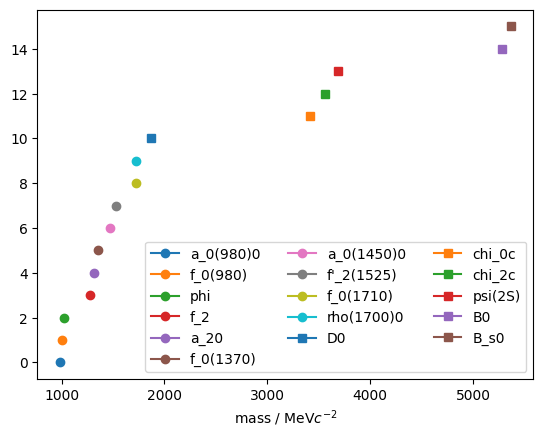

In [39]:
# TODO: we should make this information accessible via the chromo API
fn = pythia8_data / "xmldoc" / "ParticleData.xml"
lines = ["<root>"]
with open(fn) as f:
    for iline, line in enumerate(f.readlines()):
        if iline < 166: continue
        if "</chapter>" in line: break
        lines.append(line)
lines.append("</root>")

tree = ET.fromstring("".join(lines))

all_kk = []

pid_k = int(lp.K_plus.pdgid)

for p in tree.findall("particle"):
    for ch in p.findall("channel"):
        da = [int(x) for x in ch.attrib["products"].split()]
        if len(da) != 2: continue
        if all(abs(pi) == pid_k for pi in da):
            pa = p.attrib
            all_kk.append((pa["name"], float(pa["m0"])))

from cycler import cycler
from matplotlib.colors import TABLEAU_COLORS

c = cycler(marker="osd") * cycler(color=TABLEAU_COLORS)

plt.gca().set_prop_cycle(c)

i = 0
for kk in sorted(all_kk, key=lambda x: x[1]):
    plt.plot(kk[1] * 1e3, i, label=kk[0])
    i+=1
plt.legend(ncol=3)
plt.xlabel("mass / MeV$c^{-2}$");

In [40]:
for kk in sorted(all_kk, key=lambda x:x[1]):
    print(kk[0], kk[1] * 1e3)

a_0(980)0 983.5
f_0(980) 1000.0
phi 1019.46
f_2 1275.1
a_20 1318.3
f_0(1370) 1350.0
a_0(1450)0 1474.0
f'_2(1525) 1525.0
f_0(1710) 1720.0
rho(1700)0 1720.0
D0 1864.86
chi_0c 3414.75
chi_2c 3556.2
psi(2S) 3686.11
B0 5279.58
B_s0 5366.7699999999995
